Determine what is expected outcome of the game

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading data from csv
data = pd.read_csv("NBAdataõige.csv", sep=",")

C:\Users\Edvard\AppData\Local\Temp\ipykernel_24652\3526434771.py:2: DtypeWarning: Columns (68,69,70) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("NBAdataõige.csv", sep=",")


In [3]:
data.columns

Index(['game_id', 'game_date', 'OT', 'H_A', 'Team_Abbrev', 'Team_Score',
       'Team_pace', 'Team_efg_pct', 'Team_tov_pct', 'Team_orb_pct',
       'Team_ft_rate', 'Team_off_rtg', 'Inactives', 'Opponent_Abbrev',
       'Opponent_Score', 'Opponent_pace', 'Opponent_efg_pct',
       'Opponent_tov_pct', 'Opponent_orb_pct', 'Opponent_ft_rate',
       'Opponent_off_rtg', 'player', 'player_id', 'starter', 'mp', 'fg', 'fga',
       'fg_pct', 'fg3', 'fg3a', 'fg3_pct', 'ft', 'fta', 'ft_pct', 'orb', 'drb',
       'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'plus_minus',
       'did_not_play', 'is_inactive', 'ts_pct', 'efg_pct', 'fg3a_per_fga_pct',
       'fta_per_fga_pct', 'orb_pct', 'drb_pct', 'trb_pct', 'ast_pct',
       'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 'off_rtg', 'def_rtg', 'bpm',
       'season', 'minutes', 'double_double', 'triple_double', 'DKP', 'FDP',
       'SDP', 'DKP_per_minute', 'FDP_per_minute', 'SDP_per_minute',
       'pf_per_minute', 'ts', 'last_60_minutes_per_game_s

In [4]:
data.head()

,game_id,game_date,OT,H_A,Team_Abbrev,Team_Score,Team_pace,Team_efg_pct,Team_tov_pct,Team_orb_pct,...,pf_per_minute,ts,last_60_minutes_per_game_starting,last_60_minutes_per_game_bench,PG%,SG%,SF%,PF%,C%,active_position_minutes
0,202012220BRK,2020-12-22,0,A,GSW,99,110.5,0.424,14.2,22.8,...,0.128068,17.76,NaN,NaN,0.0,0.0,47.0,51.0,3.0,NaN
1,202012220BRK,2020-12-22,0,A,GSW,99,110.5,0.424,14.2,22.8,...,0.032985,22.76,NaN,NaN,82.0,18.0,0.0,0.0,0.0,NaN
2,202012220BRK,2020-12-22,0,A,GSW,99,110.5,0.424,14.2,22.8,...,0.038986,14.00,NaN,NaN,0.0,33.0,40.0,25.0,2.0,NaN
3,202012220BRK,2020-12-22,0,A,GSW,99,110.5,0.424,14.2,22.8,...,0.082361,16.52,NaN,NaN,0.0,0.0,0.0,0.0,100.0,NaN
4,202012220BRK,2020-12-22,0,A,GSW,99,110.5,0.424,14.2,22.8,...,0.046404,6.88,NaN,NaN,0.0,0.0,2.0,33.0,65.0,NaN


In [5]:
data.shape

(89499, 81)

In [6]:
data['game_id'].unique().shape

(2314,)

In [7]:
# Copying data into new dataset with values that are needed
df2 = pd.DataFrame([data.game_id, data.game_date, data.Team_Score, data.player, data.player_id, data.mp, data.fg_pct, data.fg3_pct, data.ft_pct, data.ast, data.stl, data.blk, data.pts, data.plus_minus]).transpose()

df2.shape

(89499, 14)

In [8]:
# A dataframe of all played games, with columns for team names and repective scores
games_data = pd.DataFrame([data.game_id, data.Team_Abbrev, data.Team_Score, data.Opponent_Abbrev, data.Opponent_Score,
                           data.Team_pace, data.Team_efg_pct, data.Team_tov_pct, data.Team_orb_pct, data.Team_ft_rate,
                           data.Opponent_pace, data.Opponent_efg_pct, data.Opponent_tov_pct, data.Opponent_orb_pct,
                           data.Opponent_ft_rate]).T.drop_duplicates('game_id')
games_data.rename(columns = {'Team_Abbrev':'team1', 'Team_Score':'team1_score', 'Opponent_Abbrev':'team2',
                             'Opponent_Score':'team2_score', 'Team_pace' : 'team1_pace', 'Team_efg_pct' : 'team1_efgP',
                             'Team_tov_pct' : 'team1_tovP', 'Team_orb_pct' : 'team1_orbP', 'Team_ft_rate' : 'team1_ftr',
                             'Opponent_pace' : 'team2_pace', 'Opponent_efg_pct' : 'team2_efgP',
                             'Opponent_tov_pct' : 'team2_tovP', 'Opponent_orb_pct' : 'team2_orbP',
                             'Opponent_ft_rate' : 'team2_ftr'}, inplace = True)
games_data['home'] = games_data['game_id'].str.slice(-3,)

games_data.shape

(2314, 16)

In [9]:
games_data['won'] = games_data.team1_score > games_data.team2_score if games_data.home.equals(games_data.team1) else games_data.team1_score < games_data.team2_score

In [10]:
games_data.head()

,game_id,team1,team1_score,team2,team2_score,team1_pace,team1_efgP,team1_tovP,team1_orbP,team1_ftr,team2_pace,team2_efgP,team2_tovP,team2_orbP,team2_ftr,home,won
0,202012220BRK,GSW,99,BRK,125,110.5,0.424,14.2,22.8,0.152,110.5,0.538,15.9,27.7,0.283,BRK,True
13,202012250MIL,GSW,99,MIL,138,107.5,0.394,9.1,16.9,0.212,107.5,0.667,14.4,25.0,0.2,MIL,True
26,202012270CHI,GSW,129,CHI,128,115.2,0.49,9.3,17.5,0.26,115.2,0.61,19.4,18.4,0.267,CHI,False
38,202012290DET,GSW,116,DET,106,102.2,0.592,17.1,12.1,0.342,102.2,0.451,12.5,30.8,0.25,DET,False
50,202101010GSW,GSW,98,POR,123,104.4,0.437,13.8,6.5,0.367,104.4,0.543,8.7,16.3,0.25,GSW,True


In [11]:
games_data.shape

(2314, 17)

In [12]:
teams_data = pd.DataFrame([data.Team_Abbrev]).T.drop_duplicates('Team_Abbrev')
teams_data.rename(columns = {'Team_Abbrev':'team'}, inplace = True)

teams_data.head()

,team
0,GSW
940,BRK
2949,LAC
5227,LAL
7210,CHO


In [13]:
len(games_data[(games_data.home == 'GSW') & (games_data.won)])

20

In [14]:
teams_data['points'] = 0
teams_data['home_wins'] = 0
teams_data['home_losses'] = 0
teams_data['home_winrate'] = 0

for t in teams_data['team']:
    #print('team:', t)
    points1 = games_data[games_data.team1 == t]['team1_score'].sum()
    points2 = games_data[games_data.team2 == t]['team2_score'].sum()
    #print('overall points:', points1 + points2)
    
    home_wins = len(games_data[(games_data.home == t) & (games_data.won == True)])
    #print('homew wins:', home_wins)
    home_losses = len(games_data[(games_data.home == t) & (games_data.won == False)])
    
    teams_data['points'].loc[teams_data['team'] == t] = points1 + points2
    teams_data['home_wins'].loc[teams_data['team'] == t] = home_wins
    teams_data['home_losses'].loc[teams_data['team'] == t] = home_losses
    teams_data['home_winrate'].loc[teams_data['team'] == t] = home_wins / (home_losses + home_wins)
    
print(teams_data.shape)
print(teams_data.head(30))

C:\Users\Edvard\AppData\Local\Temp\ipykernel_24652\1097259972.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams_data['points'].loc[teams_data['team'] == t] = points1 + points2
C:\Users\Edvard\AppData\Local\Temp\ipykernel_24652\1097259972.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams_data['home_wins'].loc[teams_data['team'] == t] = home_wins
C:\Users\Edvard\AppData\Local\Temp\ipykernel_24652\1097259972.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

(30, 5)
      team  points  home_wins  home_losses  home_winrate
0      GSW   15311         20           51      0.281690
940    BRK   18358         24           57      0.296296
2949   LAC   20188         31           58      0.348315
5227   LAL   18998         30           57      0.344828
7210   CHO   14685         37           30      0.552239
8183   CLE   14424         43           29      0.597222
9073   NYK   15174         29           43      0.402778
10934  IND   16953         36           39      0.480000
11896  MIA   18662         39           45      0.464286
13899  ORL   15854         44           29      0.602740
14778  WAS   17428         42           33      0.560000
16778  PHI   18063         46           34      0.575000
19028  NOP   16592         38           34      0.527778
19997  TOR   17332         38           40      0.487179
20940  MIL   20960         57           31      0.647727
23438  BOS   18830         47           36      0.566265
25449  ATL   17587     

In [15]:
games_data[games_data.home == games_data.team1].won.value_counts() + games_data[games_data.home == games_data.team2].won.value_counts()

False    1171
True     1143
Name: won, dtype: int64

In [24]:
teams_data.head(50)

,team,points,home_wins,home_losses,home_winrate
0,GSW,15311,20,51,0.281690
940,BRK,18358,24,57,0.296296
2949,LAC,20188,31,58,0.348315
5227,LAL,18998,30,57,0.344828
7210,CHO,14685,37,30,0.552239
8183,CLE,14424,43,29,0.597222
9073,NYK,15174,29,43,0.402778
10934,IND,16953,36,39,0.480000
11896,MIA,18662,39,45,0.464286
13899,ORL,15854,44,29,0.602740


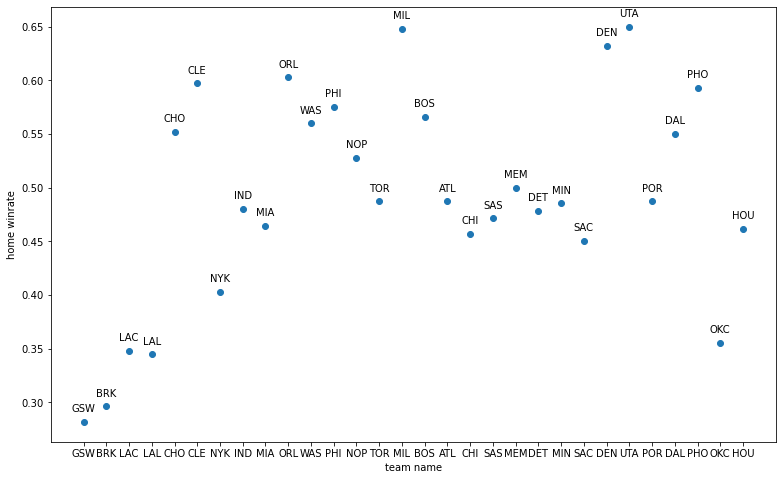

In [50]:

#teams_data.plot(x='team', y='home_winrate',kind='scatter', label='team name', figsize=(15,10))


xs = teams_data['team']
ys = teams_data['home_winrate']

plt.figure(figsize=(13,8))
plt.xlabel('team name')
plt.ylabel('home winrate')
plt.scatter(xs, ys)

for x,y in zip(xs,ys):

    label = f"{x}"

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

<AxesSubplot:ylabel='team'>

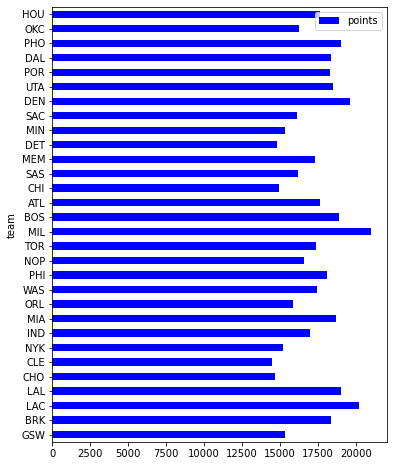

In [52]:
teams_data.plot(x='team', y='points', kind='barh', color='b', figsize=(6,8))